In [4]:
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
mpl.rc("font", family="Arial")
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pylab import *

import numpy as np
import pandas as pd

import pytraj as pt
import mdtraj as md

import pickle
import os
import sys

import random

from collections import Counter

from glob import glob

import free_energy_clustering as FEC

In [2]:
with open('./pickled/2-Without_IPA/Z_dt1.pickle', 'rb') as inf:
    Z = pickle.load(inf)
with open('./pickled/2-Without_IPA/coords_dt1.pickle', 'rb') as inf:
    coords = pickle.load(inf)
with open('./pickled/2-Without_IPA/FE_landscape_dt1.pickle', 'rb') as inf:
    FE_landscape = pickle.load(inf)
with open('./pickled/2-Without_IPA/FE_points_dt1.pickle', 'rb') as inf:
    FE_points = pickle.load(inf)

with open('./pickled/1-With_IPA/Z_dt1.pickle', 'rb') as inf:
    Z_ipa = pickle.load(inf)
with open('./pickled/1-With_IPA/coords_dt1.pickle', 'rb') as inf:
    coords_ipa = pickle.load(inf)
with open('./pickled/1-With_IPA/FE_landscape_dt1.pickle', 'rb') as inf:
    FE_landscape_ipa = pickle.load(inf)
with open('./pickled/1-With_IPA/FE_points_dt1.pickle', 'rb') as inf:
    FE_points_ipa = pickle.load(inf)

In [3]:
np.concatenate((np.arange(0.0, 2.0, 0.25),np.arange(2.0, 4.0, 0.5)))

array([0.  , 0.25, 0.5 , ..., 2.5 , 3.  , 3.5 ])

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Blues_r"))
  
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Reds_r"))
  if __name__ == '__main__':


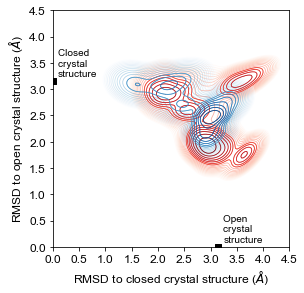

In [18]:
diverging_colors = sns.color_palette("RdBu_r", 50)
sns_cmap = mpl.colors.LinearSegmentedColormap.from_list("", diverging_colors)

# Set custom colormaps
my_cmap1 = mpl.cm.get_cmap('Blues_r')
my_cmap1.set_over('white')

my_cmap2 = mpl.cm.get_cmap("Reds_r")
my_cmap2.set_over('white')


fig, ax = plt.subplots(figsize=(4.25,4.25))

ax.contour(coords_ipa[0], coords_ipa[1], FE_landscape_ipa, 
           cmap=my_cmap2, vmin=0,vmax=4.5, 
           levels=np.arange(0.0, 4.75, 0.25),
           extend="neither", alpha=0.5,
           linewidths=0.75)

ax.contour(coords[0], coords[1], FE_landscape, 
           cmap=my_cmap1, vmin=0,vmax=4.5,
           levels=np.arange(0.0, 4.75, 0.25),
           extend="neither", alpha=0.5,
           linewidths=0.75)

ax.contour(coords_ipa[0], coords_ipa[1], FE_landscape_ipa, 
           cmap=my_cmap2, vmin=0,vmax=4.5, 
           levels=np.arange(0.0, 2.0, 0.25),
           extend="neither", alpha=1,
           linewidths=0.75)

ax.contour(coords[0], coords[1], FE_landscape, 
           cmap=my_cmap1, vmin=0,vmax=4.5,
           levels=np.arange(0.0, 2.0, 0.25),
           extend="neither", alpha=1,
           linewidths=0.75)

ax.scatter(x=0.0, y=3.1458, s=40, c="black", marker="s")
ax.scatter(x=3.1458, y=0.0, s=40, c="black", marker="s")


ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=10)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=10)
ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))
ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)', fontsize=12)
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)', fontsize=12)
ax.set_aspect('equal')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
fig.tight_layout()
fig.savefig('./plots/FES_superimposition.png', dpi=600)